<a href="https://colab.research.google.com/github/Adhithyaram29D/basic-nn-model/blob/main/Deeplearningex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('ex1').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})

In [ ]:
df.head()

,input,output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X = df[['input']].values
y = df[['output']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
AI_Brain = Sequential([
    Dense(units = 1, activation = 'relu', input_shape=[1]),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 1)
])

In [ ]:
AI_Brain.compile(optimizer= 'rmsprop', loss="mse")

In [ ]:
AI_Brain.fit(X_train1,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 680.8268
Epoch 2502/5000
1/1 [==============================] - 0s 6ms/step - loss: 680.0777
Epoch 2503/5000
1/1 [==============================] - 0s 9ms/step - loss: 679.3292
Epoch 2504/5000
1/1 [==============================] - 0s 7ms/step - loss: 678.5804
Epoch 2505/5000
1/1 [==============================] - 0s 10ms/step - loss: 677.8317
Epoch 2506/5000
1/1 [==============================] - 0s 9ms/step - loss: 677.0834
Epoch 2507/5000
1/1 [==============================] - 0s 7ms/step - loss: 676.3347
Epoch 2508/5000
1/1 [==============================] - 0s 9ms/step - loss: 675.5864
Epoch 2509/5000
1/1 [==============================] - 0s 10ms/step - loss: 674.8381
Epoch 2510/5000
1/1 [==============================] - 0s 9ms/step - loss: 674.0899
Epoch 2511/5000
1/1 [==============================] - 0s 10ms/step - loss: 673.3415
Epoch 2512/5000
1/1 [=================

In [ ]:
AI_Brain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(AI_Brain.history.history)

<Axes: >

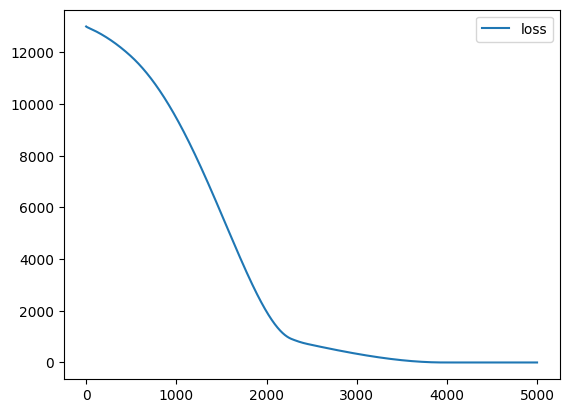

In [ ]:
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
AI_Brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 189ms/step - loss: 0.0049


0.004911400377750397

In [ ]:
X_n1 = [[20]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
AI_Brain.predict(X_n1_1)

1/1 [==============================] - 0s 29ms/step


array([[200.90042]], dtype=float32)